# Model

In [7]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp, odeint
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

class SIRModel():
    """
    Info SIR model

    S = those susceptible but not yet infected with the disease
    I = the number of infectious individuals
    R = those individuals who have recovered from the disease and now have immunity to it

    """
    
    def __init__(self, beta=0.3, gamma=0.1):
        self.params = {}
        self.params["beta"] = beta
        self.params["gamma"] = gamma

    def get_SIR_0(self, init_infected):
        I_0 = init_infected
        R_0 = 0
        S_0 = N - I_0 - R_0
        SIR_0 = S_0, I_0, R_0
        return SIR_0
        
    def fit(self, t, y, N):
        
        SIR_0 = self.get_SIR_0(y[0])
        
        f = lambda t, beta, gamma : (odeint(self.deriv, SIR_0, t, args=(N, beta, gamma)).T)[1]
        
        params, covariance = curve_fit(f, t, y)
        self.params["beta"] = params[0]
        self.params["gamma"] = params[1]
        return params, covariance
        

    def deriv(self, y, t, N, beta, gamma):
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt
    
    def predict(self, t, init_population, init_infected, init_recovered=0):
        # t_inter = (min(t), max(t))
        SIR_0 = self.get_SIR_0(init_infected)
        res = odeint(self.deriv, SIR_0, t, args=(init_population, self.params["beta"], self.params["gamma"]))
        # res = solve_ivp(self.deriv, t_inter, SIR_0, args=(init_population, self.params["beta"], self.params["gamma"]), t_eval=t)
        return res.T

# Test sur resultat connu (voir https://www.lri.fr/~estrade/exam_01.html)

paramètres model = [1.00013692 0.09999554] => True = [1, 0.1]


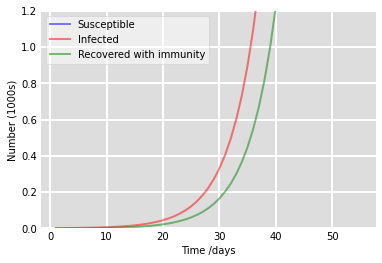

paramètres model = [0.00996143 0.00496566] => True = [0.01, 0.005]


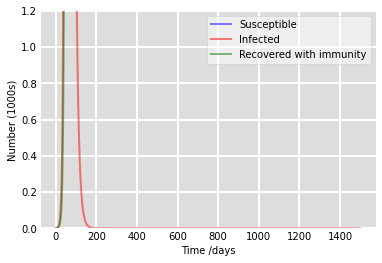

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars


paramètres model = [0.49916021 0.19919598] => True = [0.5, 0.2]


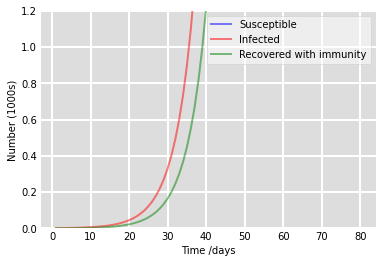

In [9]:
resultat = [[1, 0.1], [0.01, 0.005], [0.5, 0.2 ]]

for count, size_pop, list_resultat in zip( range(1,4), [55000000, 67000, 7700000000], resultat):
    
    df = pd.read_csv("/home/covid/dataset/data_{}.csv".format(count))
    N = size_pop
    I0, R0 = 1, 0
    S0 = N - df["I"][0] - R0
    t = np.linspace(1, df.shape[0], df.shape[0]) 

    sir_model = SIRModel()
    params, covariance = model.fit(t, df["I"], N)
    print("paramètres model = {} => True = {}".format(params, list_resultat))
    
    S, I, R = sir_model.predict(t, size_pop, 1)
    
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()

In [ ]:
# Variables
day_number = 160 # nb jour 
first_day_inf = 1 # nb  infecté premier jour
nb_person_already_recov = 0
population = 1000

# exec model
t = np.linspace(1, day_number, day_number)
sir_model = SIRModel()
S, I, R = sir_model.predict(t, population, first_day_inf, nb_person_already_recov)

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()